In [1]:
import os
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfzero = pd.read_csv('../zero_shot_dev_results.csv')
dffew = pd.read_csv('../few_shot_dev_results.csv')

In [3]:
# process zero-shot results
# drop file column
dfzero = dfzero.drop(columns=['file'])

# filter to rows where split contains 'dev'
dfzero = dfzero[dfzero['split'].str.contains('dev')]

# format model to split on slash if it exists
dfzero['model'] = dfzero['model'].str.split('/').str[-1]

dfzero.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,opt-iml-max-30b,0-shot,6,jfleg-dev,1,906,183,933,0.8320,0.4927,0.7312,0.499937,You are a grammatical error correction tool. Y...,0-shot_6
1,opt-iml-max-30b,0-shot,10,jfleg-dev,1,884,175,927,0.8347,0.4881,0.7309,0.500910,Reply with a corrected version of the input se...,0-shot_10
2,opt-iml-max-30b,0-shot,7,jfleg-dev,1,820,169,975,0.8291,0.4568,0.7129,0.486461,You are a grammatical error correction tool. Y...,0-shot_7
3,gpt-4-0613,0-shot,6,jfleg-dev,1,1473,654,899,0.6925,0.6210,0.6769,0.574767,system: You are a grammatical error correction...,0-shot_6
4,gpt-4-0613,0-shot,7,jfleg-dev,1,1456,654,910,0.6900,0.6154,0.6737,0.573003,system: You are a grammatical error correction...,0-shot_7


In [4]:
dfzero.prompt_type_index.unique()

array(['0-shot_6', '0-shot_10', '0-shot_7', '0-shot_8', '0-shot_5',
       '0-shot_11', '0-shot_3'], dtype=object)

In [5]:
# process few-shot results

# filter to rows where split contains 'dev'
dffew = dffew[dffew['split'].str.contains('dev')]

# format model to split on slash if it exists
dffew['model'] = dffew['model'].str.split('/').str[-1]

dffew.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,opt-iml-max-30b,3-shot,1,jfleg-dev,1,839,192,992,0.8138,0.4582,0.7045,0.498200,Reply with a corrected version of the input se...,3-shot_1
1,opt-iml-max-30b,2-shot-Coyne,1,jfleg-dev,1,919,264,957,0.7768,0.4899,0.6954,0.506410,Reply with a corrected version of the input se...,2-shot-Coyne_1
2,opt-iml-max-30b,3-shot,3,jfleg-dev,1,821,211,1005,0.7955,0.4496,0.6895,0.494307,You are an English language teacher. A student...,3-shot_3
3,opt-iml-max-30b,1-shot,3,jfleg-dev,1,710,176,1018,0.8014,0.4109,0.6734,0.470543,You are an English language teacher. A student...,1-shot_3
4,opt-iml-max-30b,1-shot,1,jfleg-dev,1,637,128,1038,0.8327,0.3803,0.6727,0.461363,Reply with a corrected version of the input se...,1-shot_1


In [6]:
dffew.prompt_type_index.unique()

array(['3-shot_1', '2-shot-Coyne_1', '3-shot_3', '1-shot_3', '1-shot_1',
       '3-shot_2', '2-shot_2', '4-shot_1', '4-shot_3', '2-shot_1',
       '1-shot_2', '4-shot_2', '2-shot_3'], dtype=object)

In [7]:
m = dfzero.model.unique()
m.sort()
m

array(['InstructPalmyra-20b', 'Llama-2-70b-chat-hf', 'StableBeluga2',
       'bloomz-7b1', 'command', 'falcon-40b-instruct', 'flan-t5-xxl',
       'gpt-3.5-turbo-0613', 'gpt-4-0613', 'opt-iml-max-30b'],
      dtype=object)

In [8]:
# concatenate zero-shot and few-shot results
df = pd.concat([dfzero, dffew])

In [10]:
df.split.unique()

array(['jfleg-dev', 'wibea-dev', 'fce-dev'], dtype=object)

In [13]:
# select rows where model is flan-t5-xxl and split is wibea-dev
df[(df['model'] == 'flan-t5-xxl') & (df['split'] == 'wibea-dev')].sort_values(by='F0.5', ascending=False)

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
138,flan-t5-xxl,3-shot,2,wibea-dev,1,1401,849,6154,0.6227,0.1854,0.4231,NaN,You are a grammatical error correction tool. Y...,3-shot_2
139,flan-t5-xxl,4-shot,2,wibea-dev,1,1380,810,6175,0.6301,0.1827,0.4229,NaN,You are a grammatical error correction tool. Y...,4-shot_2
75,flan-t5-xxl,0-shot,5,wibea-dev,1,1283,760,6272,0.6280,0.1698,0.4079,NaN,You are an English language teacher. A student...,0-shot_5
158,flan-t5-xxl,1-shot,2,wibea-dev,1,1265,761,6290,0.6244,0.1674,0.4039,NaN,You are a grammatical error correction tool. Y...,1-shot_2
159,flan-t5-xxl,3-shot,3,wibea-dev,1,1237,726,6318,0.6302,0.1637,0.4014,NaN,You are an English language teacher. A student...,3-shot_3
162,flan-t5-xxl,1-shot,3,wibea-dev,1,1182,630,6373,0.6523,0.1565,0.3992,NaN,You are an English language teacher. A student...,1-shot_3
164,flan-t5-xxl,2-shot,2,wibea-dev,1,1225,733,6330,0.6256,0.1621,0.3981,NaN,You are a grammatical error correction tool. Y...,2-shot_2
167,flan-t5-xxl,4-shot,3,wibea-dev,1,1208,712,6347,0.6292,0.1599,0.3965,NaN,You are an English language teacher. A student...,4-shot_3
89,flan-t5-xxl,0-shot,6,wibea-dev,1,1170,684,6385,0.6311,0.1549,0.3908,NaN,You are a grammatical error correction tool. Y...,0-shot_6
178,flan-t5-xxl,2-shot,3,wibea-dev,1,1104,593,6451,0.6506,0.1461,0.3849,NaN,You are an English language teacher. A student...,2-shot_3


In [32]:
def scatter_model_score_per_split(dataframe, split, hue_name='prompt_type', color_index=0):
    # create a plot and return it

    # select rows with split=split
    df_split = dataframe[dataframe['split'] == split]

    metric = 'F0.5'
    if 'jfleg' in split:
        metric = 'GLEU'

    palette = sns.husl_palette(10)[color_index]

    # order dataframe by this list:
    df_split = df_split.sort_values(by=['model'], key=lambda x: x.map({'bloomz-7b1': 1, 'flan-t5-xxl': 2, 'InstructPalmyra-20b': 3, 'opt-iml-max-30b': 4, 'falcon-40b-instruct': 5, 'Llama-2-70b-chat-hf': 6, 'StableBeluga2': 7, 'command': 8, 'gpt-3.5-turbo-0613': 9, 'gpt-4-0613': 10}))

    # rename models
    df_split['model'] = df_split['model'].replace({
        'bloomz-7b1': 'Bloomz',
        'flan-t5-xxl': 'Flan-T5',
        'InstructPalmyra-20b': 'InstructPalmyra',
        'opt-iml-max-30b': 'OPT-IML-MAX',
        'falcon-40b-instruct': 'Falcon',
        'Llama-2-70b-chat-hf': 'Llama-2-chat',
        'StableBeluga2': 'StableBeluga2',
        'command': 'Cohere Command',
        'gpt-3.5-turbo-0613': 'GPT-3.5-turbo',
        'gpt-4-0613': 'GPT-4'})

    # scatter plot df_model_f05, with model as x-axis and f0.5 as y-axis, color blue
    # sns.scatterplot(data=df_split, x='model', y=metric, hue='prompt_type')

    # box plot df_model_f05, with model as x-axis and f0.5 as y-axis, color blue
    if hue_name:
        hue_name = 'prompt' if 'prompt' in df_split.columns else 'prompt_type'
        # sns.boxplot(data=df_split, x='model', y=metric, hue=hue_name, width=0.5)
        # stripplot
        sns.stripplot(data=df_split, x='model', y=metric, hue=hue_name, dodge=True, alpha=1, jitter=0, hue_order = ['zero-shot', 'few-shot'])
    else:
        # plot with first color in palette
        # sns.boxplot(data=df_split, x='model', y=metric, color="C1", width=0.5)
        # stripplot
        sns.stripplot(data=df_split, x='model', y=metric, color="C1", dodge=True, alpha=1, jitter=0, hue_order = ['zero-shot', 'few-shot'])

    # violin plot df_model_f05, with model as x-axis and f0.5 as y-axis, color blue
    # sns.violinplot(data=df_split, x='model', y=metric)

    # increase font size
    plt.rcParams.update({'font.size': 12})

    # set title
    # plt.title(f'{metric} per model per {split}')

    # set x-axis label
    plt.xlabel('Model')

    # remove x-labels
    # plt.xticks([])

    # set y-axis label using subscript
    plt.ylabel(metric)

    # set y-limit
    if 'jfleg' in split:
        plt.ylim(0, 0.7)
    else:
        plt.ylim(0, 0.6)


    # rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # return plot
    # return plt

In [33]:

def plot(df):
    # create a figure with subplots for each split in df_model_f05
    n_subplots = len(df['split'].unique())

    # create a figure with subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    # fig, axs = plt.subplots(n_subplots, figsize=(20, 20))

    # map split to index
    split_to_axes = {
        # 'jfleg-test': 3,
        # 'jfleg-dev': 2,
        # 'fce-test': 4,
        # 'fce-dev': 5,
        # 'conll14-test': 6,
        # 'wibea-dev': 1
        
        'jfleg-dev': 1,
        'fce-dev': 2,
        'wibea-dev': 3
    }

    # for each split, plot the scatter plot
    # iterate through split_to_axes.items() sorted by value
    for _, (split, i) in enumerate(sorted(split_to_axes.items(), key=lambda x: x[1])):
        # create a scatter plot for split
        scatter_model_score_per_split(df, split)

        # hide the legend unless i==2
        if i != 2:
            plt.legend().remove()

        # set the subplot
        plt.subplot(1, 3, i)
        print(split, i)


    # save plt to file in high quality with increased clipping
    # plt.savefig('model_score_per_dev_split.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


jfleg-dev 1
fce-dev 2
wibea-dev 3


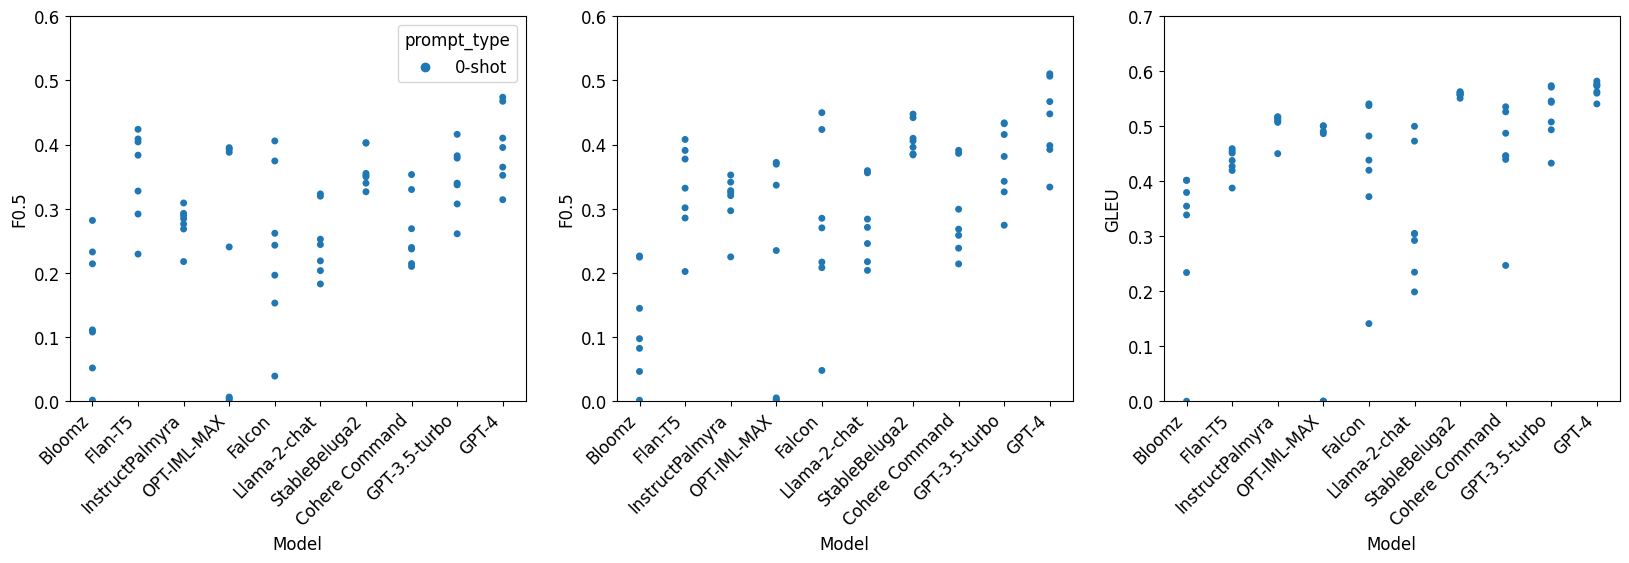

In [20]:
plot(dfzero)

In [24]:
for s in ['fce-dev', 'jfleg-dev', 'wibea-dev']:
    f = scatter_model_score_per_split(dfzero, s)
    # remove legend
    plt.legend().remove()
    # save plot in high quality
    plt.savefig(f'zero-shot-{s}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    # clear plot
    plt.clf()

<Figure size 640x480 with 0 Axes>

jfleg-dev 1
fce-dev 2
wibea-dev 3


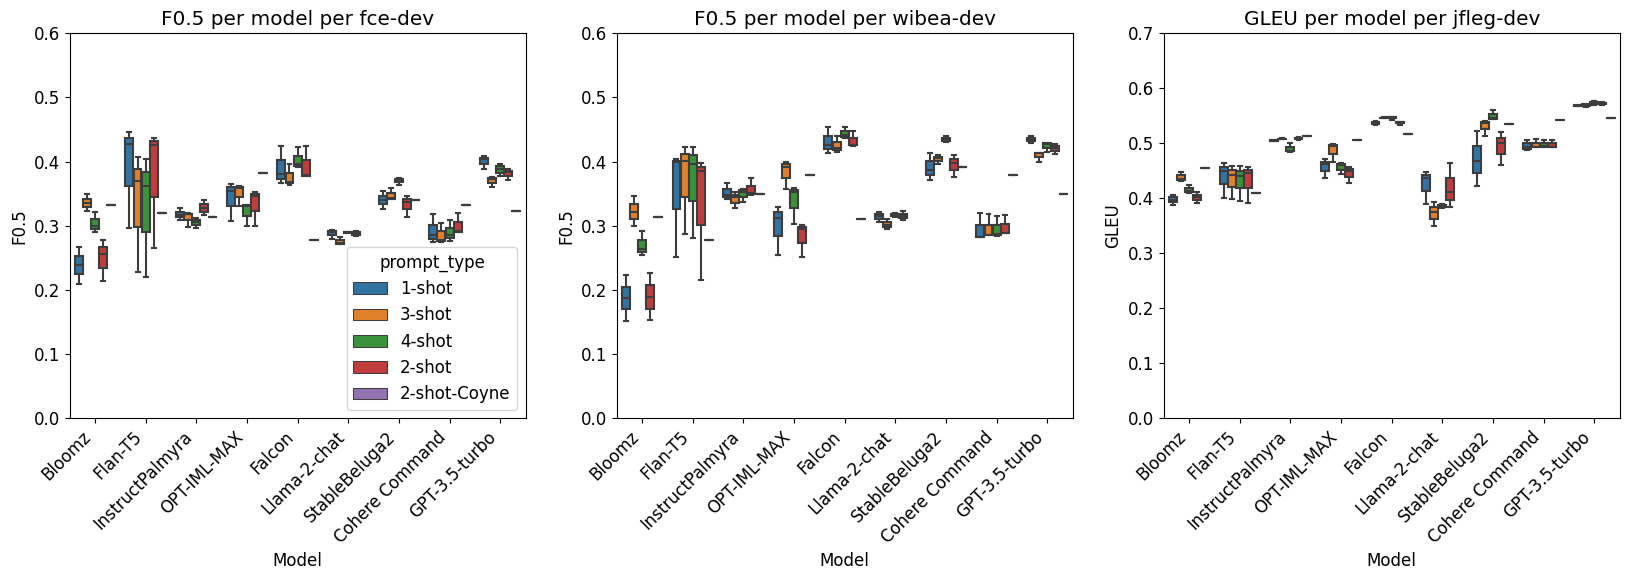

In [47]:
plot(dffew)

In [25]:
dffewplot = dffew.copy()
# set prompt_type to few-shot
dffewplot['prompt'] = 'few-shot'
for s in ['fce-dev', 'jfleg-dev', 'wibea-dev']:
    f = scatter_model_score_per_split(dffewplot, s, hue_name=None, color_index=4)
    # save model in high quality
    plt.savefig(f'few-shot_{s}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    # clear plot
    plt.clf()

# remove legend
# plt.legend().remove()


<Figure size 640x480 with 0 Axes>

In [48]:
m

array(['InstructPalmyra-20b', 'Llama-2-70b-chat-hf', 'StableBeluga2',
       'bloomz-7b1', 'command', 'falcon-40b-instruct', 'flan-t5-xxl',
       'gpt-3.5-turbo-0613', 'gpt-4-0613', 'opt-iml-max-30b'],
      dtype=object)

In [49]:
def filter(df, split=None, model=None):
    # filter df_model_f05 by split and model
    if split:
        df = df[df['split'] == split]

    if model:
        df = df[df['model'] == model]

    return df

In [50]:
filter(dfzero, split='jfleg-dev', model=m[8])

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
6,gpt-4-0613,0-shot,6,jfleg-dev,1,1473,654,899,0.6925,0.6210,0.6769,0.574767,system: You are a grammatical error correction...,0-shot_6
8,gpt-4-0613,0-shot,7,jfleg-dev,1,1456,654,910,0.6900,0.6154,0.6737,0.573003,system: You are a grammatical error correction...,0-shot_7
9,gpt-4-0613,0-shot,8,jfleg-dev,1,1532,713,877,0.6824,0.6359,0.6726,0.581980,system: Please correct the following text. Do...,0-shot_8
37,gpt-4-0613,0-shot,10,jfleg-dev,1,1573,949,898,0.6237,0.6366,0.6262,0.577511,system: Reply with a corrected version of the ...,0-shot_10
48,gpt-4-0613,0-shot,3,jfleg-dev,1,1582,1054,923,0.6002,0.6315,0.6062,0.560017,system: Make minimal changes to the following ...,0-shot_3
57,gpt-4-0613,0-shot,5,jfleg-dev,1,1655,1200,949,0.5797,0.6356,0.5901,0.562465,system: You are an English language teacher. A...,0-shot_5
73,gpt-4-0613,0-shot,11,jfleg-dev,1,1589,1300,1005,0.5500,0.6126,0.5615,0.540514,system: Continue the sentence. user: This sent...,0-shot_11


In [26]:
dfzero2 = dfzero.copy()
# rename prompt_type to 'zero_shot'
dfzero2['prompt_type'] = 'zero-shot'
dffew2 = dffew.copy()
# rename prompt_type to 'few_shot'
dffew2['prompt_type'] = 'few-shot'

In [27]:
df2 = pd.concat([dfzero2, dffew2])

# rename 'prompt_type' to 'prompt'
df2 = df2.rename(columns={'prompt_type': 'prompt'})

df2.head()

,model,prompt,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,opt-iml-max-30b,zero-shot,6,jfleg-dev,1,906,183,933,0.8320,0.4927,0.7312,0.499937,You are a grammatical error correction tool. Y...,0-shot_6
1,opt-iml-max-30b,zero-shot,10,jfleg-dev,1,884,175,927,0.8347,0.4881,0.7309,0.500910,Reply with a corrected version of the input se...,0-shot_10
2,opt-iml-max-30b,zero-shot,7,jfleg-dev,1,820,169,975,0.8291,0.4568,0.7129,0.486461,You are a grammatical error correction tool. Y...,0-shot_7
6,gpt-4-0613,zero-shot,6,jfleg-dev,1,1473,654,899,0.6925,0.6210,0.6769,0.574767,system: You are a grammatical error correction...,0-shot_6
8,gpt-4-0613,zero-shot,7,jfleg-dev,1,1456,654,910,0.6900,0.6154,0.6737,0.573003,system: You are a grammatical error correction...,0-shot_7


In [29]:
df2.prompt_type_index.unique()

array(['0-shot_6', '0-shot_10', '0-shot_7', '0-shot_8', '0-shot_5',
       '0-shot_11', '0-shot_3', '2-shot-Coyne_1', '3-shot_1', '3-shot_3',
       '1-shot_3', '1-shot_1', '3-shot_2', '2-shot_2', '4-shot_1',
       '4-shot_3', '2-shot_1', '1-shot_2', '4-shot_2', '2-shot_3'],
      dtype=object)

In [48]:
# remove rows with prompt_type_index in ['0-shot_11', '0-shot_3', '0-shot_8']
df2 = df2[~df2['prompt_type_index'].isin(['0-shot_11', '0-shot_7', '0-shot_3', '0-shot_8'])]
# remove row where model == 'gpt-4-0613'
df2 = df2[df2['model'] != 'gpt-4-0613']

jfleg-dev 1
fce-dev 2
wibea-dev 3


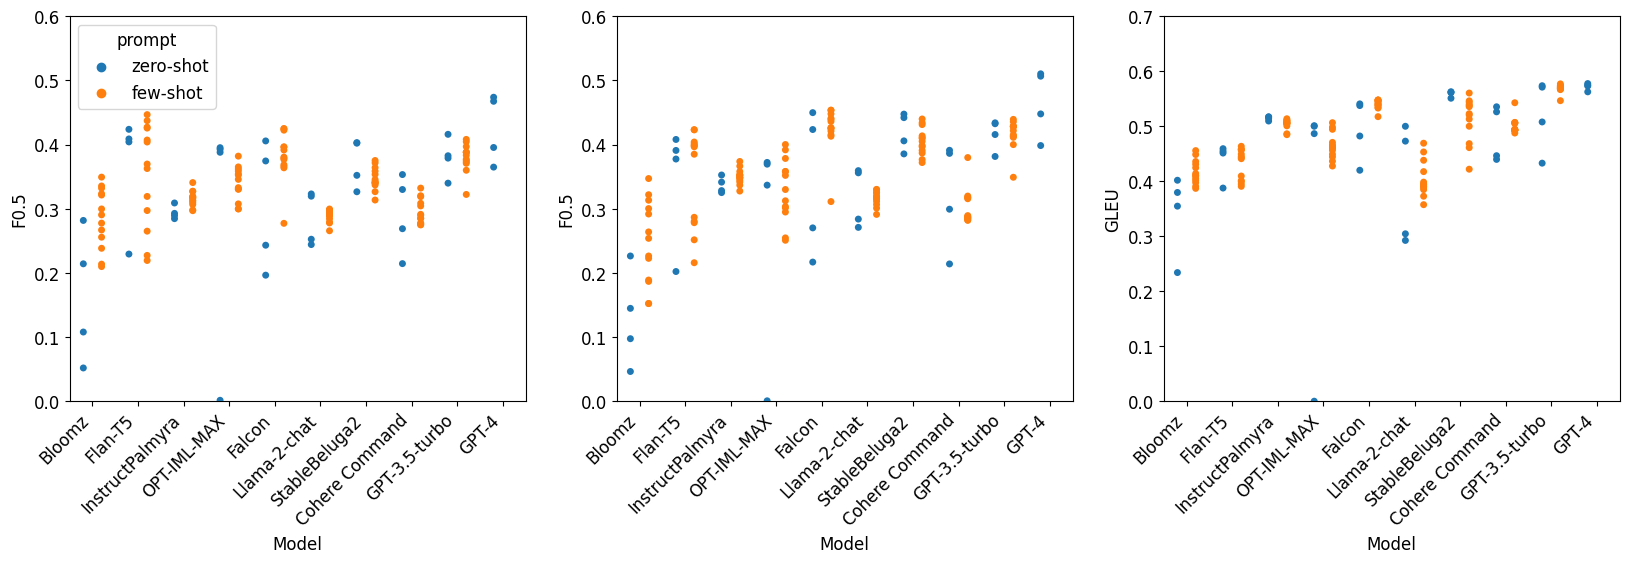

In [34]:
plot(df2)
scatter_model_score_per_split(df, split)

In [53]:
for s in ['fce-dev', 'jfleg-dev', 'wibea-dev']:
    f = scatter_model_score_per_split(df2, s)
    # remove legend title
    plt.legend().set_title('')
    # position legend top and horizontal
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)
    # remove legend
    # plt.legend().remove()
    # save model in high quality
    plt.savefig(f'zero-few-shot_{s}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    # clear plot
    plt.clf()
    # break


<Figure size 640x480 with 0 Axes>